## Instalar paquetes necesarios
- Pandas (Para cargar CSV)
- NumPy
- Matplotlib (Para visualizar datos)
- SKLearn
- Seaborn

In [2]:
# Instalar paquetes necesarios
import sys
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Cargar dataset
Cargar y visualizar dataset of laptops

In [38]:
dataframe = pd.read_csv(r"laptops.csv")
dataframe.head()

,Manufacturer,Model.Name,Category,Screen,CPU,Storage,GPU,Operating.System,Weight,Price,CPU.Speed,Storage.Type,GPU.Rank,Storage.Size,RAM.Size,Screen.Size,Category.Type,GPU.Speed
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,1,698,128,8,33.782,2,1939
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,1,934,128,8,33.782,2,1703
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,1,885,256,8,39.624,1,1752
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,1,359,512,16,39.116,2,2278
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,1,590,256,8,33.782,2,2047


In [39]:
dataframe.describe()

,Weight,Price,CPU.Speed,Storage.Type,GPU.Rank,Storage.Size,RAM.Size,Screen.Size,Category.Type,GPU.Speed
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,2.037229,1123.686992,2.298388,0.704528,808.433615,583.012279,8.382195,38.143665,2.269378,1828.566385
std,0.663249,699.009043,0.506992,0.456430,369.751230,427.449649,5.084665,3.622812,1.837159,369.751230
min,0.690000,174.000000,0.900000,0.000000,50.000000,1.000000,2.000000,25.654000,1.000000,1.000000
25%,1.500000,599.000000,2.000000,0.000000,659.000000,256.000000,4.000000,35.560000,1.000000,1716.000000
50%,2.040000,977.000000,2.500000,1.000000,885.000000,500.000000,8.000000,39.624000,1.000000,1752.000000
75%,2.300000,1487.880000,2.700000,1.000000,921.000000,1024.000000,8.000000,39.624000,3.000000,1978.000000
max,4.700000,6099.000000,3.600000,1.000000,2636.000000,2048.000000,64.000000,46.736000,6.000000,2587.000000


## Graficar las entradas
Basado en sus diferentes propiedades, se muestra como se distribuyen los equipos

array([[<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'CPU.Speed'}>],
       [<AxesSubplot:title={'center':'GPU.Speed'}>,
        <AxesSubplot:title={'center':'Storage.Size'}>,
        <AxesSubplot:title={'center':'RAM.Size'}>],
       [<AxesSubplot:title={'center':'Screen.Size'}>,
        <AxesSubplot:title={'center':'Category.Type'}>,
        <AxesSubplot:title={'center':'Storage.Type'}>]], dtype=object)

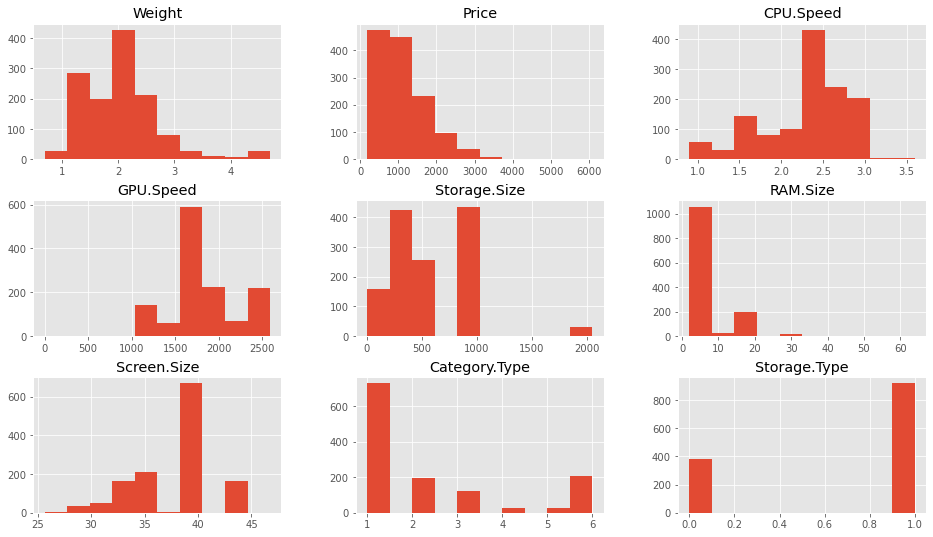

In [42]:
dataframe.hist(["Weight", "Price", "CPU.Speed", "GPU.Speed", "Storage.Size", "RAM.Size", "Screen.Size", "Category.Type", "Storage.Type"])

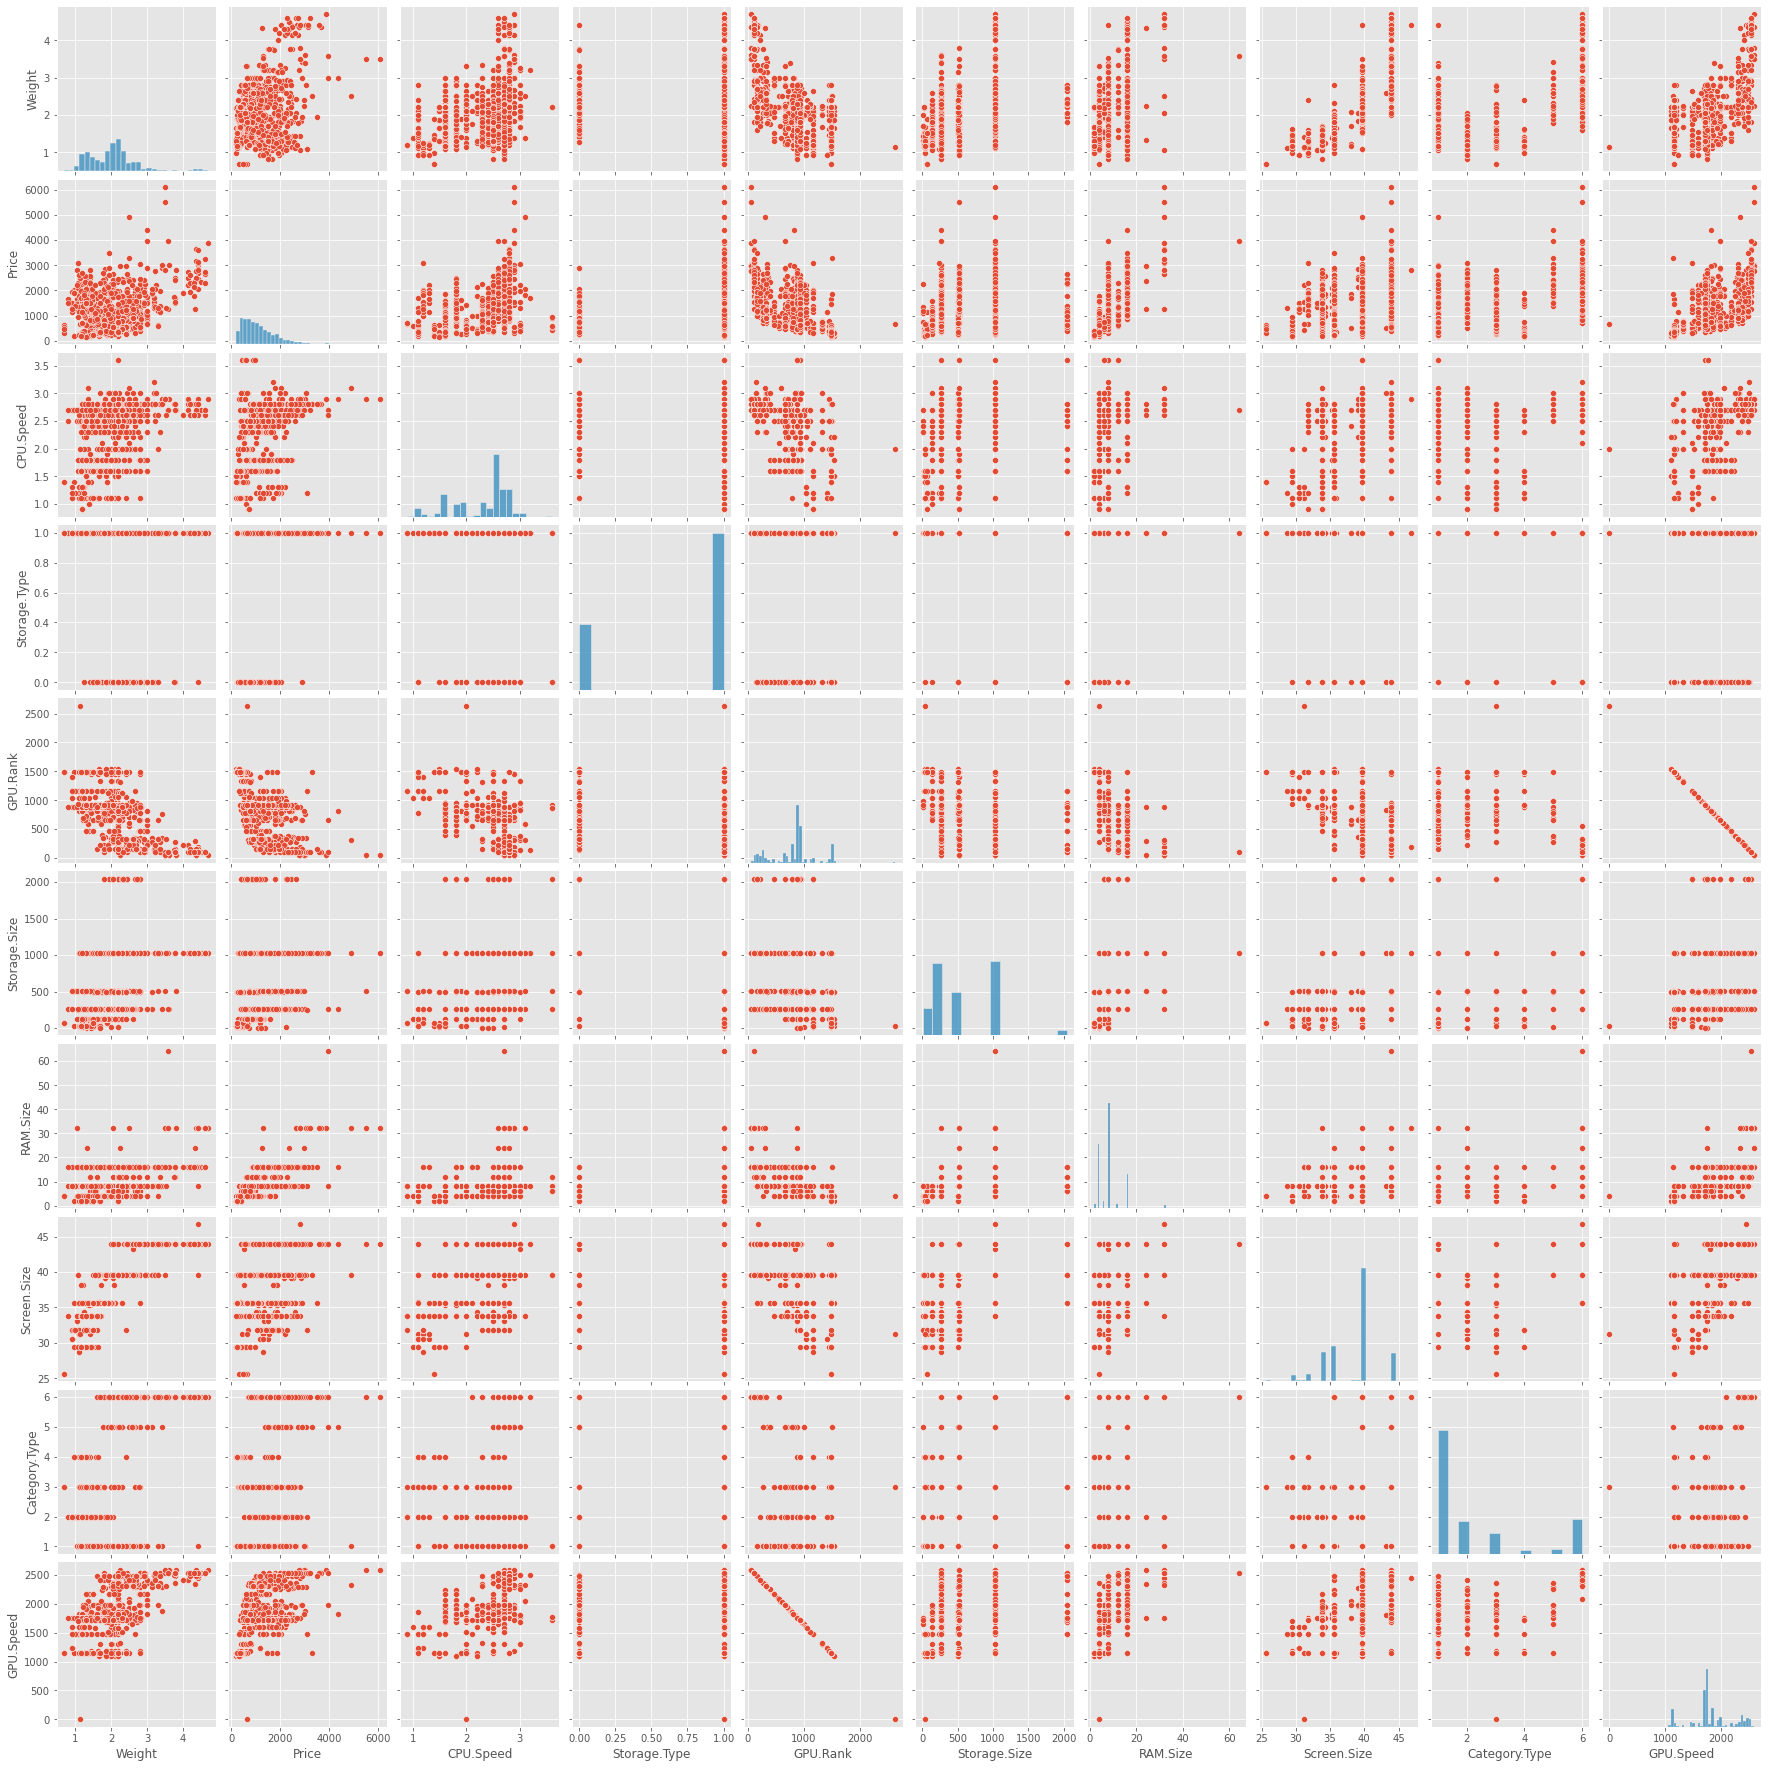

In [60]:
sb.pairplot(dataframe)

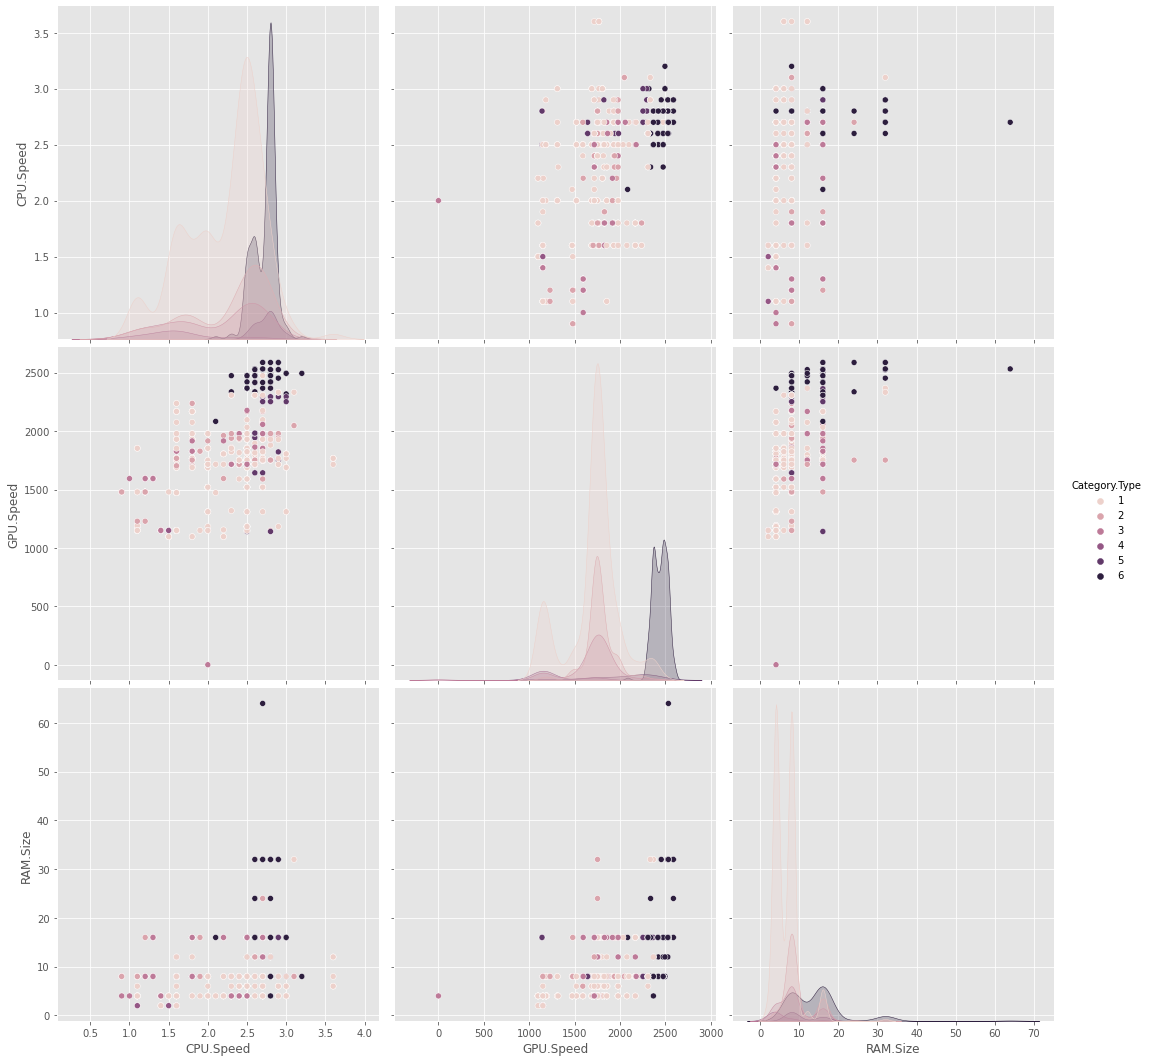

In [65]:
sb.pairplot(dataframe, hue="Category.Type", height=5, vars=["CPU.Speed", "GPU.Speed", "RAM.Size"], kind="scatter")

In [73]:
X = np.array(dataframe[["CPU.Speed", "GPU.Speed", "RAM.Size"]])
y = np.array(dataframe["Category.Type"])
X.shape

(1303, 3)

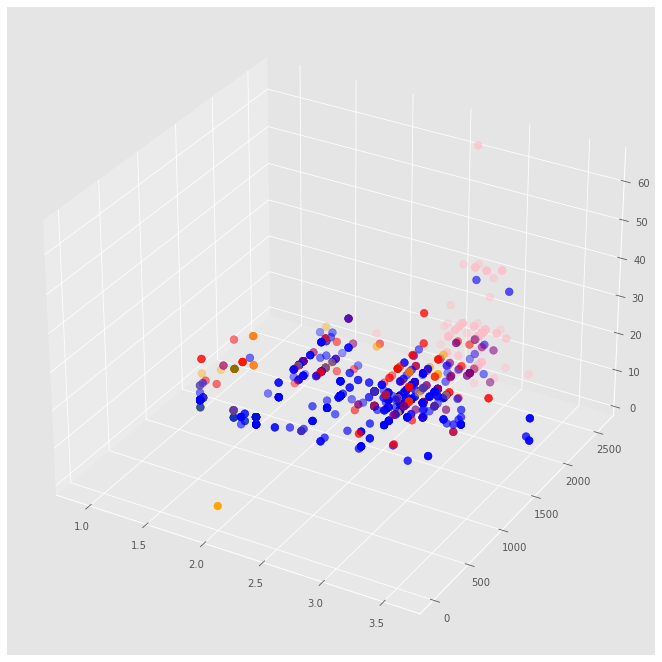

In [114]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
colors = ["blue", "red", "orange", "green", "purple", "pink"]
asign = []
for row in y:
    asign.append(colors[row - 1])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asign, s=60)

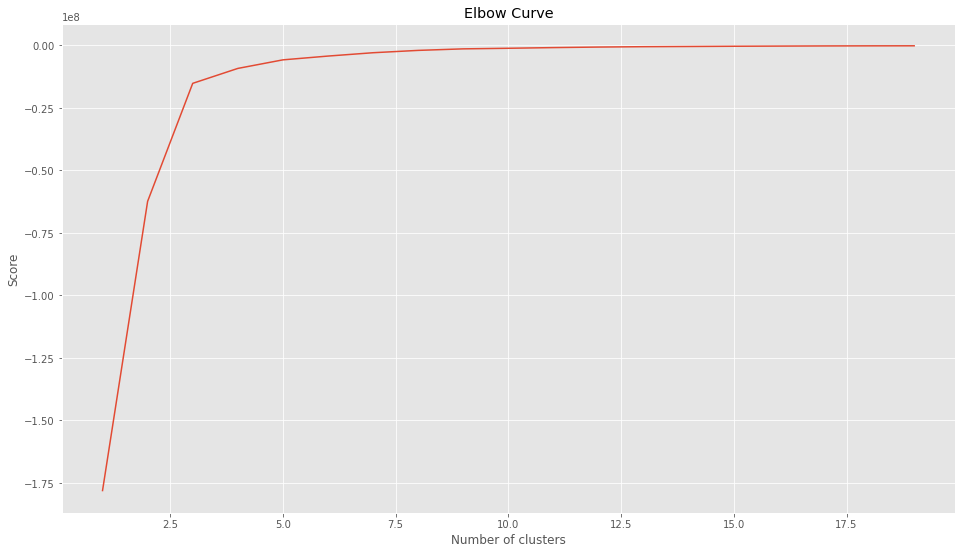

In [85]:
nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(nc, score)
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

In [117]:
kmeans = KMeans(n_clusters=5).fit(X)
kmeans
centerIds = kmeans.cluster_centers_
centerIds

array([[2.71395349e+00, 2.41665504e+03, 1.34651163e+01],
       [2.34169096e+00, 1.75495918e+03, 7.52478134e+00],
       [1.58888889e+00, 1.15800654e+03, 4.16993464e+00],
       [2.36592593e+00, 1.99872593e+03, 8.75555556e+00],
       [1.77042254e+00, 1.52422535e+03, 6.56338028e+00]])

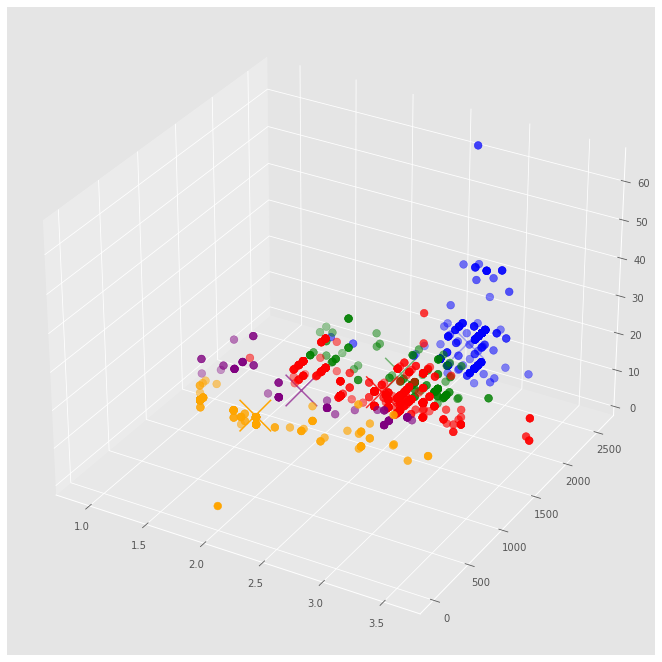

In [118]:
labels = kmeans.predict(X)
C = centerIds

colors = ["blue", "red", "orange", "green", "purple"]

assign = []
for row in labels:
    assign.append(colors[row])

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=assign, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker="x", c=colors, s=1000)



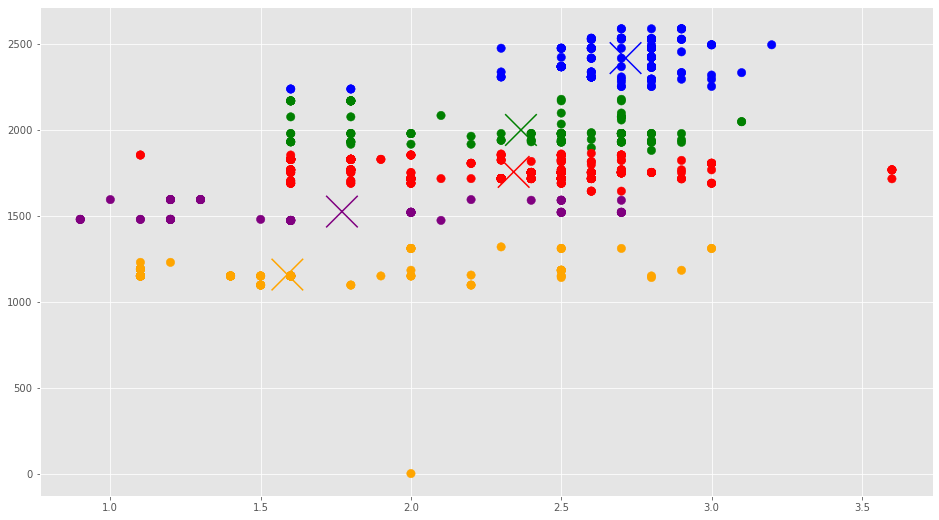

In [121]:
figureCpu = dataframe["CPU.Speed"].values
figureGpu = dataframe["GPU.Speed"].values

plt.scatter(figureCpu, figureGpu, c=assign, s=70)
plt.scatter(C[:, 0], C[:, 1], marker="x", c=colors, s=1000)

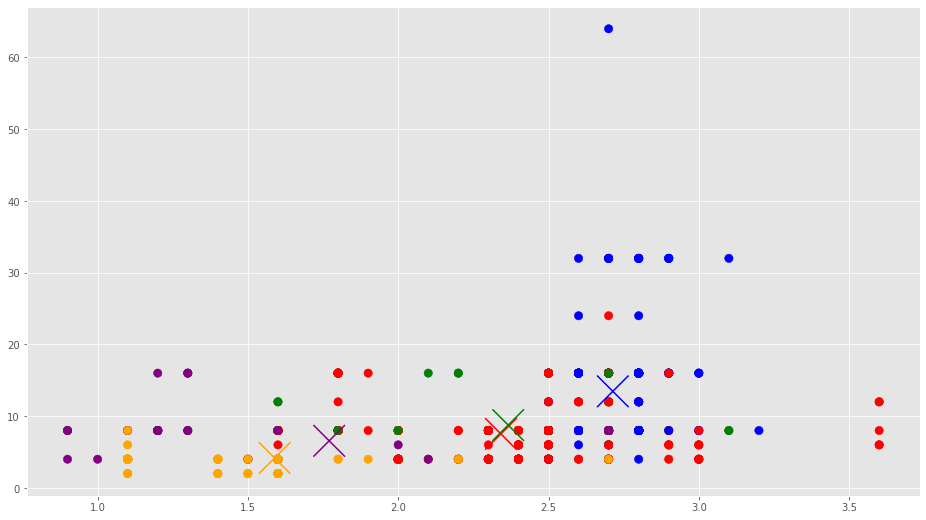

In [127]:
figureCpu = dataframe["CPU.Speed"].values
figureRam = dataframe["RAM.Size"].values

plt.scatter(figureCpu, figureRam, c=assign, s=70)
plt.scatter(C[:, 0], C[:, 2], marker="x", c=colors, s=1000)

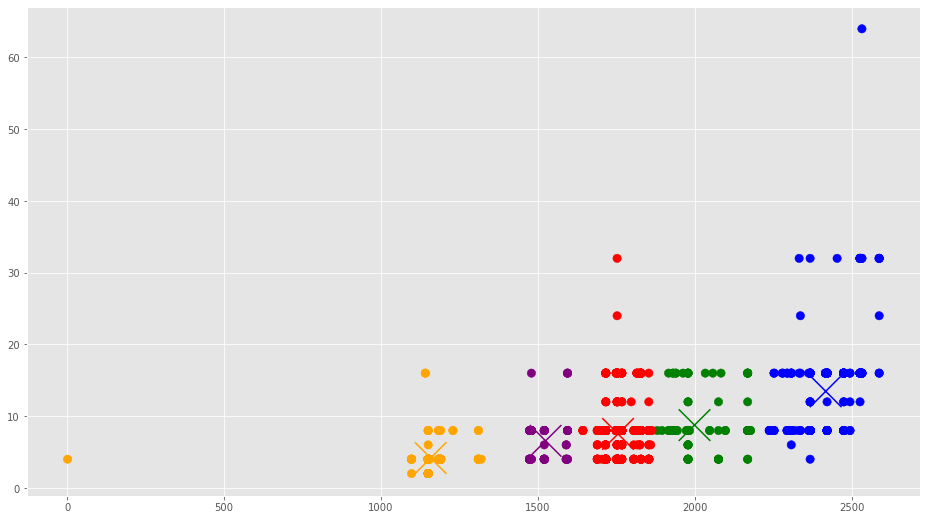

In [128]:
figureGpu = dataframe["GPU.Speed"].values
figureRam = dataframe["RAM.Size"].values

plt.scatter(figureGpu, figureRam, c=assign, s=70)
plt.scatter(C[:, 1], C[:, 2], marker="x", c=colors, s=1000)

In [129]:
summary = pd.DataFrame()
# X = np.array(dataframe[["CPU.Speed", "GPU.Speed", "RAM.Size"]])
summary["Category.Type"] = dataframe["Category.Type"].values
summary["Label"] = labels

groups = pd.DataFrame()
groups["Color"] = colors
groups["Quantity"] = summary.groupby("Label").size()
groups

,Color,Quantity
0,blue,258
1,red,686
2,orange,153
3,green,135
4,purple,71
